Import libraries 

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import glob
from pathlib import Path
import re
import numpy as np
%matplotlib inline 

In [3]:
path = '/home/bejanca/projects/ks-er/data/' 

In [4]:
data = pd.read_csv(path + 'maps/Batch1.GoldAnnotation.Category.txt', delimiter = ' ', names = ['label', 'file_name'])
data['text'] = data.file_name.apply(lambda x: Path(f'{path}batch1-in-txt/{x}').read_text())
# data.head()

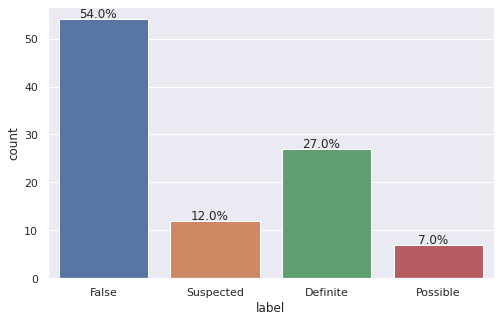

In [5]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(data = data, x = 'label')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x - 0.45, y+ 0.35),ha='center')
plt.show()

## Data cleaning 

Let's find a word - cut till this word and then remove the line 

In [6]:
data['index'] = data.text.str.find('DOS')

In [10]:
data['index']

0     103
1     157
2      -1
3     161
4     117
     ... 
95     -1
96     -1
97    102
98     -1
99     -1
Name: index, Length: 100, dtype: int64

In [16]:
data.text[0][data.index[0] :10]

'Attending '

In [29]:
# data['clean'] = np.where(data['index'] != -1,  lambda x: data.text.str[data['index']:], data.text)

data['clean'] = np.where(data['index'] != -1,  data['clean'].apply(lambda x: x[data['index']:]), data.text)

data['clean'] = data['clean'].apply(lambda x: re.sub("DOS.*", '', x,  re.DOTALL).strip())

TypeError: 'float' object is not subscriptable

In [28]:
# data['clean'][0]

In [30]:
# trying to get this to work 